#빅데이터 마케팅 분석 전문가 #4


##1.인공신경망

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Ubion/data/Ashopping.csv", encoding = "cp949")

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [7]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

###분류예측

In [8]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [9]:
#5. 모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train) : 0.889
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.85      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



###회귀예측

In [12]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [16]:
import numpy as np

#1.변수선택
X = df[df.이탈여부 == 0][['방문빈도', '총 할인 금액', '고객등급', '구매유형', '거래기간', 
                   '할인민감여부', '평균 구매주기']]
Y = df[df.이탈여부 == 0]["1회 평균매출액"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문빈도', '총 할인 금액', '거래기간', '평균 구매주기']), 
                        ("onehot", OneHotEncoder(sparse = False), ['고객등급', '구매유형', '할인민감여부'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
#4. 모델링 
from sklearn.neural_network import MLPRegressor

#4-1.모델 생성
nn_reg_model = MLPRegressor(random_state = 0, alpha = 0.001, max_iter = 2000, 
                            hidden_layer_sizes = [50, 50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

#딥러닝


###경고문 제거

In [20]:
import warnings
warnings.filterwarnings("ignore")

##DNN(Deep learning : Deep Neural Network)

###분류예측

In [21]:
#1.변수선택
X = df[['총매출액', '구매금액대', '1회 평균매출액', '평균 구매주기', '거래기간']]
Y = df["할인민감여부"]

#2.train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '평균 구매주기', '거래기간']), 
                        ("onehot", OneHotEncoder(sparse = False), ['구매금액대'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7. 모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, 
                    batch_size = 64, verbose = 2)

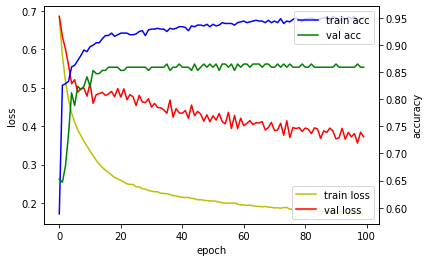

In [26]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [33]:
model.fit(X_train, Y_train, validation_split = 0.3, epochs = 10, 
                    batch_size = 64, verbose = 1)

Epoch 1/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.9561 - val_loss: 0.2280 - val_accuracy: 0.8976
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9561 - val_loss: 0.2383 - val_accuracy: 0.8976
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9561 - val_loss: 0.2275 - val_accuracy: 0.8976
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.9595 - val_loss: 0.2303 - val_accuracy: 0.8976
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.9595 - val_loss: 0.2235 - val_accuracy: 0.8976
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9544 - val_loss: 0.2270 - val_accuracy: 0.8937
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1120 - accuracy: 0.9544 - val_loss: 0.2301 - val_accuracy: 0.8976
Epoch 8/10
10/10 [==

In [34]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 확률: \n ", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 확률: 
  [[9.9833375e-01]
 [1.0000000e+00]
 [1.8775911e-04]
 [1.0459732e-04]
 [1.0000000e+00]]
Y 예측 클래스 : 
  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.145
test accuracy : 0.274
